In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import các thư viện cần thiết
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

In [3]:
# Đọc dữ liệu
file_path = '/content/drive/MyDrive/IS353.P11_Nhóm_4/Đồ án môn học/Project/data_sampled.csv'
data = pd.read_csv(file_path)

In [4]:
# Hiển thị thông tin cơ bản của dữ liệu
print("Dữ liệu đầu vào:")
print(data.head())
print("\nThông tin dữ liệu:")
print(data.info())
print("\nKiểm tra giá trị thiếu:")
print(data.isnull().sum())

Dữ liệu đầu vào:
   Unnamed: 0   namsinh   gioitinh      noisinh       lopsh    khoa   hedt  \
0        1279    1998.0        1.0    Thanh Hóa  KHMT2016.1    KHMT      0   
1         561    1996.0        1.0    Quảng Nam    KTMT0001    KTMT      0   
2         173    1995.0        1.0      Nghệ An    MMTT2013  MMT&TT      0   
3         475    1996.0        1.0    Khánh Hoà    HTTT2014    HTTT      0   
4        1529    1998.0        1.0  Hồ Chí Minh    KHMT0001    KHMT      0   

    khoahoc  chuyennganh2  dien_tt  ...  AVHK7  drlhk1  drlhk2  drlhk3  \
0      11.0       D480101      0.0  ...      4      56      62      78   
1       9.0       D520214     -1.0  ...      2      67      51      80   
2       8.0       D480102      0.0  ...      4      94      70      81   
3       9.0       D480104     -1.0  ...      4      67      67      88   
4      11.0       D480101      0.0  ...      4      69      76      85   

   drlhk4  drlhk5  drlhk6  drlhk7   xeploai  cluster  
0      68     

In [5]:
# Làm sạch tên cột
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(r'\s+', '_', regex=True)
print("\nTên cột sau khi làm sạch:")
print(data.columns.tolist())


Tên cột sau khi làm sạch:
['Unnamed:_0', 'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc', 'chuyennganh2', 'dien_tt', 'diem_tt', 'dtbhk1', 'dtbhk2', 'dtbhk3', 'dtbhk4', 'dtbhk5', 'dtbhk6', 'dtbhk7', 'dtbhkh1', 'dtbhkh2', 'dtbhkh3', 'stchk1', 'stchk2', 'stchk3', 'stchk4', 'stchk5', 'stchk6', 'stchk7', 'stchkh1', 'stchkh2', 'stchkh3', 'sotc_tichluy', 'hoclaihk1', 'hoclaihk2', 'hoclaihk3', 'hoclaihk4', 'hoclaihk5', 'hoclaihk6', 'hoclaihk7', 'hoclaihkh1', 'hoclaihkh2', 'hoclaihkh3', 'AVHK1', 'AVHK2', 'AVHKH1', 'AVHK3', 'AVHK4', 'AVHKH2', 'AVHK5', 'AVHK6', 'AVHKH3', 'AVHK7', 'drlhk1', 'drlhk2', 'drlhk3', 'drlhk4', 'drlhk5', 'drlhk6', 'drlhk7', 'xeploai', 'cluster']


In [6]:
print("\nTạo Directed Network...")
directed_graph = nx.DiGraph()


Tạo Directed Network...


In [7]:
# Xác định các cột học kỳ
semester_columns = ['dtbhk1', 'dtbhk2', 'dtbhk3']

for index, row in data.iterrows():
    student_id = row['mssv'] if 'mssv' in data.columns else index
    for semester in semester_columns:
        if pd.notnull(row[semester]):
            directed_graph.add_edge(student_id, semester, weight=row[semester])

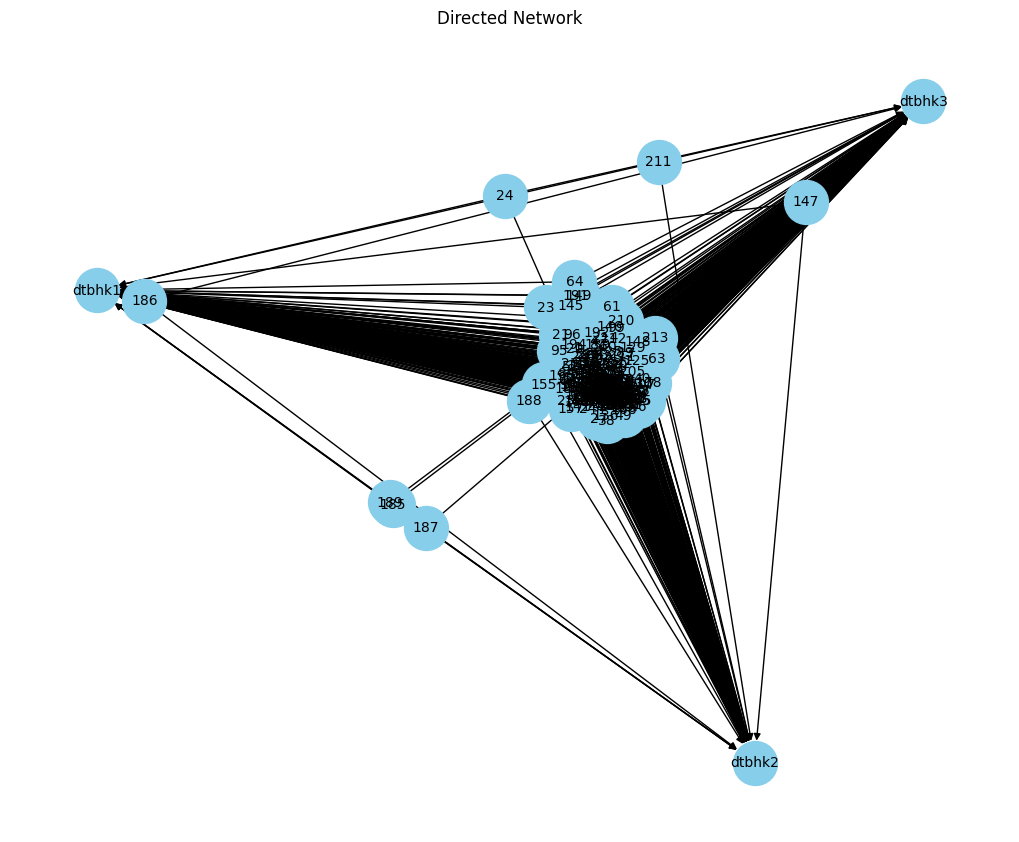

In [8]:
# Vẽ Directed Graph
plt.figure(figsize=(10, 8))
nx.draw(
    directed_graph,
    with_labels=True,
    node_color="skyblue",
    node_size=1000,
    font_size=10,
    font_color="black"
)
plt.title("Directed Network")
plt.show()

In [9]:
print("\nTạo Undirected Network...")
undirected_graph = nx.Graph()


Tạo Undirected Network...


In [10]:
# Tạo cạnh giữa các sinh viên cùng lớp
for department_name, group in data.groupby('lopsh'):
    students = group.index.tolist()
    for u, v in combinations(students, 2):
        undirected_graph.add_edge(u, v)

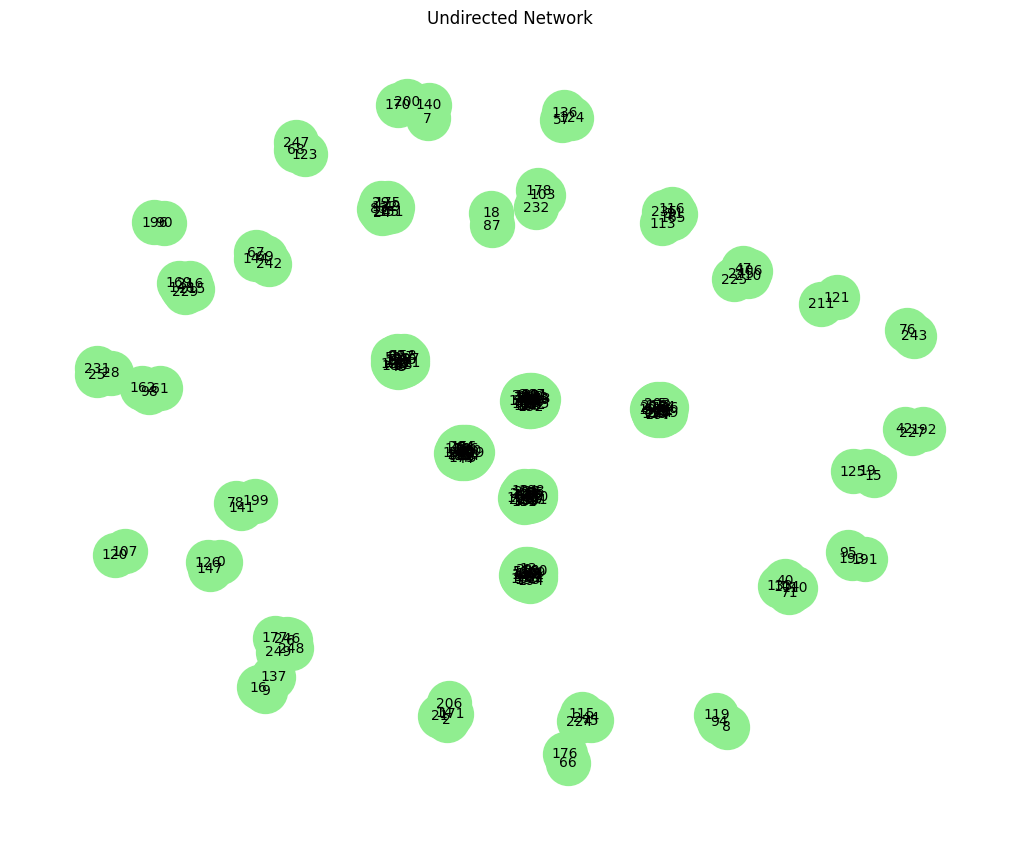

In [11]:
# Vẽ Undirected Graph
plt.figure(figsize=(10, 8))
nx.draw(
    undirected_graph,
    with_labels=True,
    node_color="lightgreen",
    node_size=1000,
    font_size=10,
    font_color="black"
)
plt.title("Undirected Network")
plt.show()

In [12]:
print("\nTạo Bipartite Network...")
bipartite_graph = nx.Graph()


Tạo Bipartite Network...


In [13]:
# Thêm nút cho sinh viên và học kỳ
students = data.index.tolist()
semesters = semester_columns

bipartite_graph.add_nodes_from(students, bipartite=0)
bipartite_graph.add_nodes_from(semesters, bipartite=1)

In [14]:
# Thêm cạnh giữa sinh viên và học kỳ
for index, row in data.iterrows():
    for semester in semesters:
        if pd.notnull(row[semester]):
            bipartite_graph.add_edge(index, semester, weight=row[semester])

In [15]:
# Kiểm tra tính bipartite
if nx.is_bipartite(bipartite_graph):
    print("Bipartite Graph is valid!")
else:
    print("Bipartite Graph is NOT valid!")

Bipartite Graph is valid!


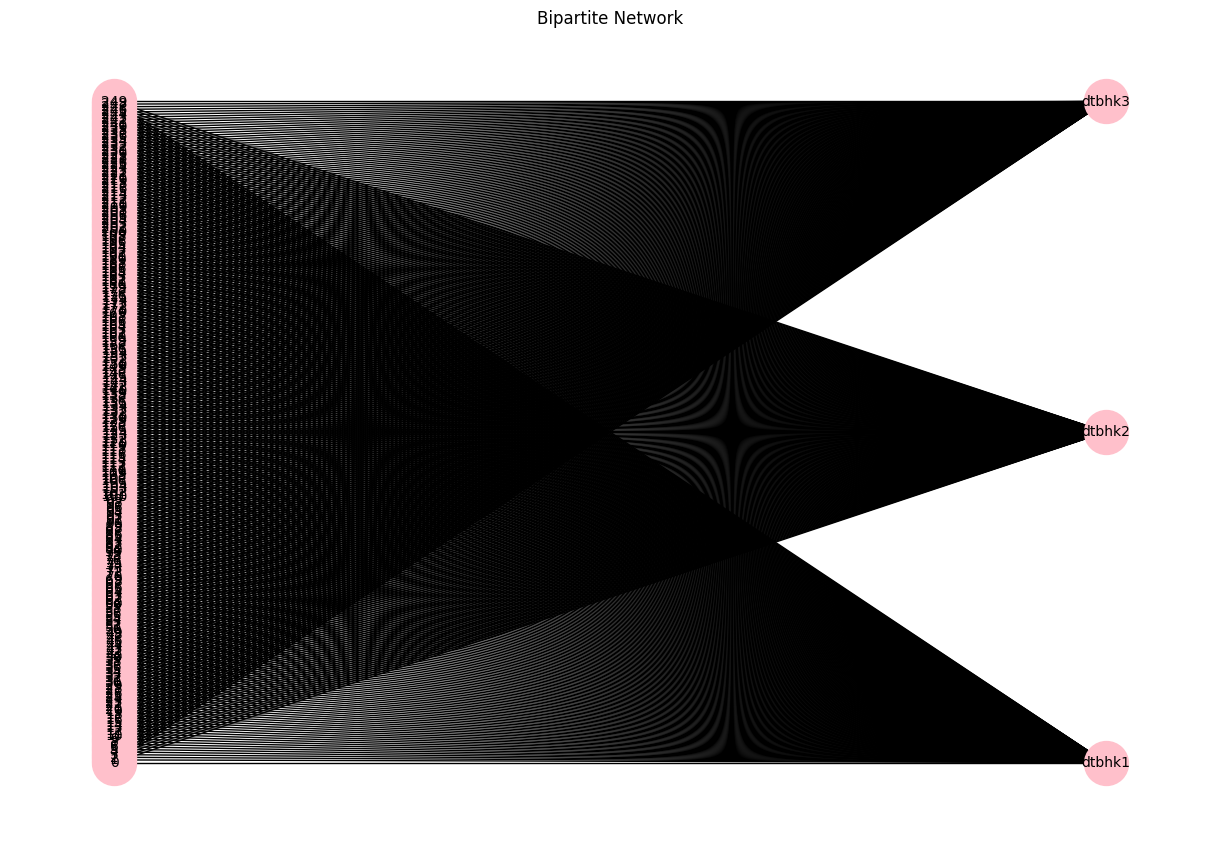

In [16]:
# Vẽ Bipartite Graph
plt.figure(figsize=(12, 8))
pos = nx.bipartite_layout(bipartite_graph, students)
nx.draw(
    bipartite_graph,
    pos,
    with_labels=True,
    node_color="pink",
    node_size=1000,
    font_size=10,
    font_color="black"
)
plt.title("Bipartite Network")
plt.show()

In [17]:
print("\nPhân tích các mạng:")
print(f"- Directed Network: {directed_graph.number_of_nodes()} nodes, {directed_graph.number_of_edges()} edges")
print(f"- Undirected Network: {undirected_graph.number_of_nodes()} nodes, {undirected_graph.number_of_edges()} edges")
print(f"- Bipartite Network: {bipartite_graph.number_of_nodes()} nodes, {bipartite_graph.number_of_edges()} edges")


Phân tích các mạng:
- Directed Network: 253 nodes, 750 edges
- Undirected Network: 220 nodes, 1350 edges
- Bipartite Network: 253 nodes, 750 edges


In [18]:
# Phân tích thêm: Degree, Clustering
print("\nDirected Network - Degree Information:")
print(dict(directed_graph.degree()))


Directed Network - Degree Information:
{0: 3, 'dtbhk1': 250, 'dtbhk2': 250, 'dtbhk3': 250, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3, 14: 3, 15: 3, 16: 3, 17: 3, 18: 3, 19: 3, 20: 3, 21: 3, 22: 3, 23: 3, 24: 3, 25: 3, 26: 3, 27: 3, 28: 3, 29: 3, 30: 3, 31: 3, 32: 3, 33: 3, 34: 3, 35: 3, 36: 3, 37: 3, 38: 3, 39: 3, 40: 3, 41: 3, 42: 3, 43: 3, 44: 3, 45: 3, 46: 3, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 3, 53: 3, 54: 3, 55: 3, 56: 3, 57: 3, 58: 3, 59: 3, 60: 3, 61: 3, 62: 3, 63: 3, 64: 3, 65: 3, 66: 3, 67: 3, 68: 3, 69: 3, 70: 3, 71: 3, 72: 3, 73: 3, 74: 3, 75: 3, 76: 3, 77: 3, 78: 3, 79: 3, 80: 3, 81: 3, 82: 3, 83: 3, 84: 3, 85: 3, 86: 3, 87: 3, 88: 3, 89: 3, 90: 3, 91: 3, 92: 3, 93: 3, 94: 3, 95: 3, 96: 3, 97: 3, 98: 3, 99: 3, 100: 3, 101: 3, 102: 3, 103: 3, 104: 3, 105: 3, 106: 3, 107: 3, 108: 3, 109: 3, 110: 3, 111: 3, 112: 3, 113: 3, 114: 3, 115: 3, 116: 3, 117: 3, 118: 3, 119: 3, 120: 3, 121: 3, 122: 3, 123: 3, 124: 3, 125: 3, 126: 3, 127: 3, 

In [19]:
print("\nUndirected Network - Clustering Coefficient:")
print(nx.average_clustering(undirected_graph))


Undirected Network - Clustering Coefficient:
0.9181818181818182
